## Monk-1 

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]
ytrain = ytrain.reshape(ytrain.shape[0], 1)
ytest = ytest.reshape(ytest.shape[0], 1)

In [43]:
import numpy as np

from wavegrad.utility import *
from wavegrad.network import Sequential
from wavegrad.layers import LayerDense
from wavegrad.activations import *
from wavegrad.losses import MAE, MSE
from wavegrad.optimizers import *
from wavegrad.regularizer import L2, L1

In [61]:
# network
net = Sequential()
net.add(LayerDense(17, 4, sigmoid))
net.add(LayerDense(4, 1, tanh))
optim = GD(net.layers, lr=0.01, momentum=0.9)
# train
reg = L2(l2=0.01)
net.use(MSE)
net.fit(Xtrain, ytrain, epochs=500, optimizer=optim, validation_split=0.2, regularizer=reg)

epoch 500/500   error=0.00    accuracy=1.00    val_error=0.00    val_acc=1.00: 100%|██████████| 500/500 [00:05<00:00, 90.81it/s]


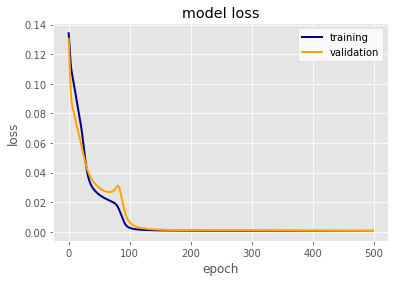

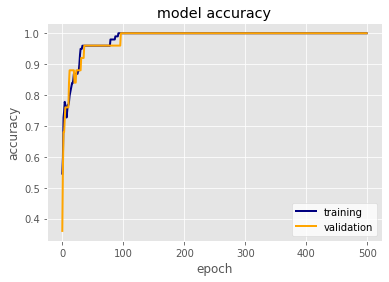

In [62]:
plot_loss(net)
plot_accuracy(net)

In [63]:
# Test accuracy on test set.
out = net.predict(Xtest)
accuracy(ytest, out)

1.0

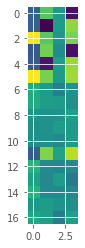

In [14]:
plt.imshow(net.layers[0].weights)

## Mnist-dataset

## Non provare ad eseguirlo sul mio pc che lo distruggi

In [8]:
# from keras.datasets import mnist
# from keras.utils import np_utils

# # load MNIST from server
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# # training data : 60000 samples
# # reshape and normalize input data
# x_train = x_train.reshape(x_train.shape[0], 28*28)
# x_train = x_train.astype('float32')
# x_train /= 255
# # encode output which is a number in range [0,9] into a vector of size 10
# # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# y_train = np_utils.to_categorical(y_train)

# # same for test data : 10000 samples
# x_test = x_test.reshape(x_test.shape[0], 28*28)
# x_test = x_test.astype('float32')
# x_test /= 255
# y_test = np_utils.to_categorical(y_test)

In [9]:
# # Network
# net = Sequential()
# net.add(LayerDense(28*28, 100, tanh))                
# net.add(LayerDense(100, 50, tanh))                   
# net.add(LayerDense(50, 10, tanh))                    

# optim = SGD(net.layers, lr=0.01, momentum=0.9)
# # train on 1000 samples
# # as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
# net.use(MSE)
# net.fit(x_train[0:1000], y_train[0:1000], epochs=500, optimizer=optim,validation_split=0.2, batch_size=32)

epoch 127/500   error=0.04    accuracy=9.61    val_error=0.06    val_acc=9.49:  25%|██▌       | 127/500 [00:11<00:35, 10.61it/s]


KeyboardInterrupt: 

In [ ]:
plot_loss(net)
plot_accuracy(net)

In [ ]:
out = net.predict(x_test)

In [ ]:
accuracy(y_test, np.round(out))

# Tensorflow model to compare with mine

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(17,)),
    keras.layers.Dense(units=5, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='tanh')
])

In [ ]:
model.summary()

The problem here is that Tensorflow don't have the Gradient Descent methos, but only the SGD so i have to implement it to compare the two networks

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), 
              loss=tf.losses.mean_squared_error,
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    Xtrain ,ytrain, epochs=500, batch_size=len(Xtrain)
)

In [ ]:
out = model.predict(Xtrain)

In [ ]:
out

In [ ]:
net.accuracy(ytest, out)

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
plt.plot(history.history['accuracy'])